# **Market Basket Analysis Using Association Rule Mining**  
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ Market Basket Analysis Using Association Rule Mining
```  

> **Project Type**

```
▶ Data EDA and Association Rule Analysis (Market Basket Analysis)
```
> **Data Source**
```
Data:https://www.kaggle.com/datasets/sivaram1987/association-rule-learningapriori

```


## **Situation Introduction**
---

> **Scenario** 

```
A mart suspects that the ongoing decline in sales is due to poor layout of goods.  
Therefore, they are planning to redesign the goods arrangement. Products that are frequently purchased together will be placed closer to each other on the shelves.  
By leveraging customer purchase(point-of-sale POS) data, the store aims to identify products that are often bought together and use this insight to optimize the layout.

```  

> **Problem Definition**

```
▶ Continuous decline in sales

```  

> **Expected Outcome**

```
▶ Sales Recovery and Growth

```

> **Proposed Solution**

```
▶ Product layout optimization through association rule mining

```

> **Performance Metric**  

```
▶ Compare sales before and after the product layout improvement

```

> **Operations**  

```
▶ Redesign product layout based on meaningful association rules

```

In [37]:
import warnings
warnings.filterwarnings('ignore')

import os

In [38]:
import numpy as np
import pandas as pd
df = pd.read_csv('association.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Process 1**  
- **Data Preprocessing and EDA**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [4]:
print('df', df.shape)

df (7501, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [6]:
print(df.isnull().sum())

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64


### Association Rule Analysis – Data Preprocessing
---

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# For each row: Iterate through each column, using isna() to check for null values (returns True if null)
# If not null, convert it to a string and append it to a list.
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])

In [9]:
print(records[3])

['turkey', 'avocado']


In [10]:
# TransactionEncoder: Converts all list values into unique items, uses them as columns, 
# transforms each row into the same structured format.
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

te_df = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
len(te.columns_)

120

In [12]:
te_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **Process 2**  
- **Explore Purchase Rules**  
---

In [13]:
te_df.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [14]:
te_df.isnull().sum()

 asparagus           0
almonds              0
antioxydant juice    0
asparagus            0
avocado              0
                    ..
whole wheat pasta    0
whole wheat rice     0
yams                 0
yogurt cake          0
zucchini             0
Length: 120, dtype: int64

### Discovering rule using apriori
---
- An algorithm that generates rules from frequent itemsets  
- Frequent itemsets: item combinations with support values above a minimum threshold  

**Steps**
```
1. Identify frequently occurring event types in the dataset  
2. Find frequent itemsets that meet or exceed the minimum support threshold  
3. Generate item combinations from frequent itemsets  
4. Repeat steps 2–3 until no new frequent itemsets emerge  
5. Generate association rules from the frequent itemsets  
```



In [15]:
# max_len = 3 → search association rules with up to 3 items per list

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(te_df,
                           min_support=0.005,
                           max_len=3,
                           use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)

In [16]:
# Return all generated rules
frequent_itemset

,support,itemsets,length
60,0.238368,(mineral water),1
27,0.179709,(eggs),1
83,0.174110,(spaghetti),1
33,0.170911,(french fries),1
20,0.163845,(chocolate),1
...,...,...,...
646,0.005066,"(mineral water, eggs, tomatoes)",3
648,0.005066,"(spaghetti, eggs, olive oil)",3
674,0.005066,"(frozen vegetables, mineral water, soup)",3
680,0.005066,"(mineral water, ground beef, grated cheese)",3


In [17]:
# Return rules containing 2 or more items
frequent_itemset[frequent_itemset['length'] >= 2].head(10)

,support,itemsets,length
503,0.059725,"(mineral water, spaghetti)",2
227,0.052660,"(chocolate, mineral water)",2
292,0.050927,"(mineral water, eggs)",2
478,0.047994,"(mineral water, milk)",2
432,0.040928,"(mineral water, ground beef)",2
236,0.039195,"(chocolate, spaghetti)",2
439,0.039195,"(ground beef, spaghetti)",2
299,0.036528,"(eggs, spaghetti)",2
277,0.036395,"(eggs, french fries)",2
387,0.035729,"(frozen vegetables, mineral water)",2


In [18]:
frequent_itemset[frequent_itemset['itemsets'] == frozenset(('bacon', 'asparagus'))]

,support,itemsets,length


In [19]:
# Set metric type and threshold as needed
association_rules_df = association_rules(frequent_itemset,
                                         metric='confidence',
                                         min_threshold=0.005)

In [20]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,"(olive oil, spaghetti)",(pancakes),0.022930,0.095054,0.005066,0.220930,2.324260,1.0,0.002886,1.161572,0.583127,0.044864,0.139098,0.137113
1936,"(pancakes, olive oil)",(spaghetti),0.010799,0.174110,0.005066,0.469136,2.694478,1.0,0.003186,1.555746,0.635736,0.028169,0.357222,0.249116
1937,(spaghetti),"(pancakes, olive oil)",0.174110,0.010799,0.005066,0.029096,2.694478,1.0,0.003186,1.018846,0.761446,0.028169,0.018498,0.249116
1938,(pancakes),"(olive oil, spaghetti)",0.095054,0.022930,0.005066,0.053296,2.324260,1.0,0.002886,1.032075,0.629602,0.044864,0.031078,0.137113


In [21]:
association_rules_df[association_rules_df['consequents']==frozenset({'eggs'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
15,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,1.0,0.005239,1.038081,0.173666,0.115126,0.036684,0.206533
17,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,1.0,0.005681,1.042232,0.188267,0.115825,0.040521,0.207735
28,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
35,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,1.0,0.007509,1.076009,0.280119,0.110579,0.070640,0.204510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,"(frozen vegetables, french fries)",(eggs),0.019064,0.179709,0.005199,0.272727,1.517602,1.0,0.001773,1.127900,0.347694,0.026860,0.113396,0.150830
1821,"(turkey, spaghetti)",(eggs),0.016531,0.179709,0.005199,0.314516,1.750138,1.0,0.002229,1.196659,0.435821,0.027216,0.164340,0.171724
1853,(tomato juice),(eggs),0.030396,0.179709,0.005066,0.166667,0.927423,1.0,-0.000396,0.984349,-0.074682,0.024707,-0.015900,0.097428
1911,"(mineral water, tomatoes)",(eggs),0.024397,0.179709,0.005066,0.207650,1.155478,1.0,0.000682,1.035263,0.137922,0.025452,0.034062,0.117920


## **Process 3**  
- **Derive Meaningful Purchase Rules**  
---

### Support/Confidence/Lift 
---

* Support : Probability that the rule occurs among all  
* Confidence : Conditional probability that B is purchased when A is purchased
* Lift : Ratio of the observed co-purchase probability of A and B to the probability of purchasing B alone

### Searching for Significant Rules
---


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(te_df,
                           min_support=0.005,
                           max_len=5,
                           use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)

In [23]:
# 725 rules generated
frequent_itemset

,support,itemsets,length
60,0.238368,(mineral water),1
27,0.179709,(eggs),1
83,0.174110,(spaghetti),1
33,0.170911,(french fries),1
20,0.163845,(chocolate),1
...,...,...,...
646,0.005066,"(mineral water, eggs, tomatoes)",3
648,0.005066,"(spaghetti, eggs, olive oil)",3
674,0.005066,"(frozen vegetables, mineral water, soup)",3
680,0.005066,"(mineral water, ground beef, grated cheese)",3


In [24]:
# Focus on rules with lift > 1 (better than random chance)
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1).sort_values(by = ['lift',  'confidence','support'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1303,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,1.0,0.004618,1.468107,0.799853,0.065770,0.318851,0.223415
1302,(escalope),(pasta),0.079323,0.015731,0.005866,0.073950,4.700812,1.0,0.004618,1.062867,0.855100,0.065770,0.059149,0.223415
1787,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,1.0,0.003942,1.369601,0.790543,0.061688,0.269860,0.196465
1786,(shrimp),(pasta),0.071457,0.015731,0.005066,0.070896,4.506672,1.0,0.003942,1.059374,0.837987,0.061688,0.056046,0.196465
662,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,1.0,0.006059,1.282270,0.780417,0.091603,0.220133,0.196475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,(escalope),(tomatoes),0.079323,0.068391,0.005466,0.068908,1.007555,1.0,0.000041,1.000555,0.008144,0.038425,0.000555,0.074415
723,(escalope),(frozen vegetables),0.079323,0.095321,0.007599,0.095798,1.005011,1.0,0.000038,1.000528,0.005416,0.045491,0.000528,0.087759
722,(frozen vegetables),(escalope),0.095321,0.079323,0.007599,0.079720,1.005011,1.0,0.000038,1.000432,0.005512,0.045491,0.000432,0.087759
1192,"(frozen vegetables, mineral water)",(french fries),0.035729,0.170911,0.006133,0.171642,1.004279,1.0,0.000026,1.000883,0.004418,0.030585,0.000882,0.103762


In [25]:
rules['support'].mean(), rules['confidence'].mean()

(0.008956302187364828, 0.15777570774772962)

In [26]:
# Identify rules with high support (frequently occurring patterns)
rules = association_rules(frequent_itemset, metric="support", min_threshold=0.05).sort_values(by = ['support', 'lift', 'confidence'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
5,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515


In [27]:
rules['support'].mean(), rules['confidence'].mean()

(0.05443718615295739, 0.2721562504810402)

In [28]:
# Identify rules with high confidence (items almost always bought together)
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.3).sort_values(by = ['confidence', 'lift', 'support'], ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
258,"(frozen vegetables, soup)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,1.0,0.003159,2.077178,0.628658,0.020994,0.518578,0.327293
248,"(olive oil, soup)",(mineral water),0.008932,0.238368,0.005199,0.582090,2.441976,1.0,0.003070,1.822476,0.595818,0.021476,0.451296,0.301951
152,"(frozen vegetables, olive oil)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,1.0,0.003831,1.798297,0.593226,0.026864,0.443918,0.301938
84,"(milk, soup)",(mineral water),0.015198,0.238368,0.008532,0.561404,2.355194,1.0,0.004909,1.736520,0.584287,0.034820,0.424136,0.298599
209,"(chocolate, soup)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,1.0,0.003184,1.702471,0.574488,0.023052,0.412618,0.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,"(chocolate, green tea)",(spaghetti),0.023464,0.174110,0.007066,0.301136,1.729574,1.0,0.002980,1.181761,0.431958,0.037089,0.153805,0.170859
35,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,1.0,0.008651,1.244861,0.599484,0.092158,0.196697,0.209038
206,(mushroom cream sauce),(escalope),0.019064,0.079323,0.005733,0.300699,3.790833,1.0,0.004220,1.316568,0.750514,0.061871,0.240450,0.186484
202,"(frozen vegetables, french fries)",(milk),0.019064,0.129583,0.005733,0.300699,2.320520,1.0,0.003262,1.244697,0.580122,0.040112,0.196591,0.172469


In [29]:
rules['support'].mean(), rules['confidence'].mean()

(0.009684532483791433, 0.38120999612700046)

Saving figure top_items


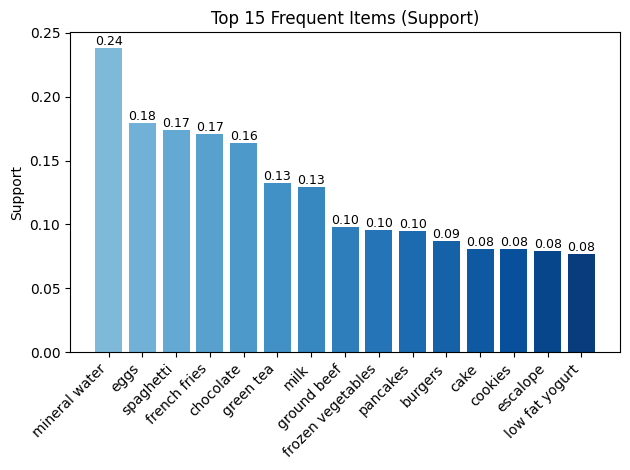

In [30]:
item_support = te_df.mean().sort_values(ascending=False)
N = 15
top_items = item_support.head(N)

cmap = plt.cm.Blues 
colors = cmap(np.linspace(0.45, 0.95, len(top_items)))

bars = plt.bar(top_items.index, top_items.values, color=colors, edgecolor='none')

for b, v in zip(bars, top_items.values):
    plt.text(b.get_x() + b.get_width()/2, v, f'{v:.2f}',
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Support')
plt.title(f'Top {N} Frequent Items (Support)')


save_fig('top_items')

plt.show()

Saving figure rules_scatter


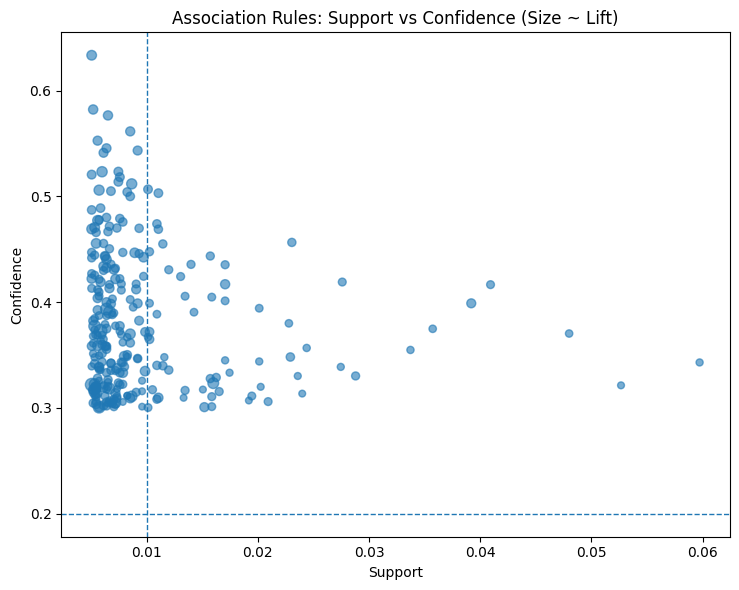

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = rules['support'].values
y = rules['confidence'].values
lift = rules['lift'].values

q75 = np.percentile(lift, 75) if len(lift) else 1.0
sizes = 40 * (lift / (q75 if q75 > 0 else 1.0))

plt.figure(figsize=(7.5, 6))
plt.scatter(x, y, s=sizes, alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Size ~ Lift)')

plt.axhline(0.20, linestyle='--', linewidth=1)  
plt.axvline(0.01, linestyle='--', linewidth=1)  

save_fig('rules_scatter')
plt.show()

Saving figure rules_network


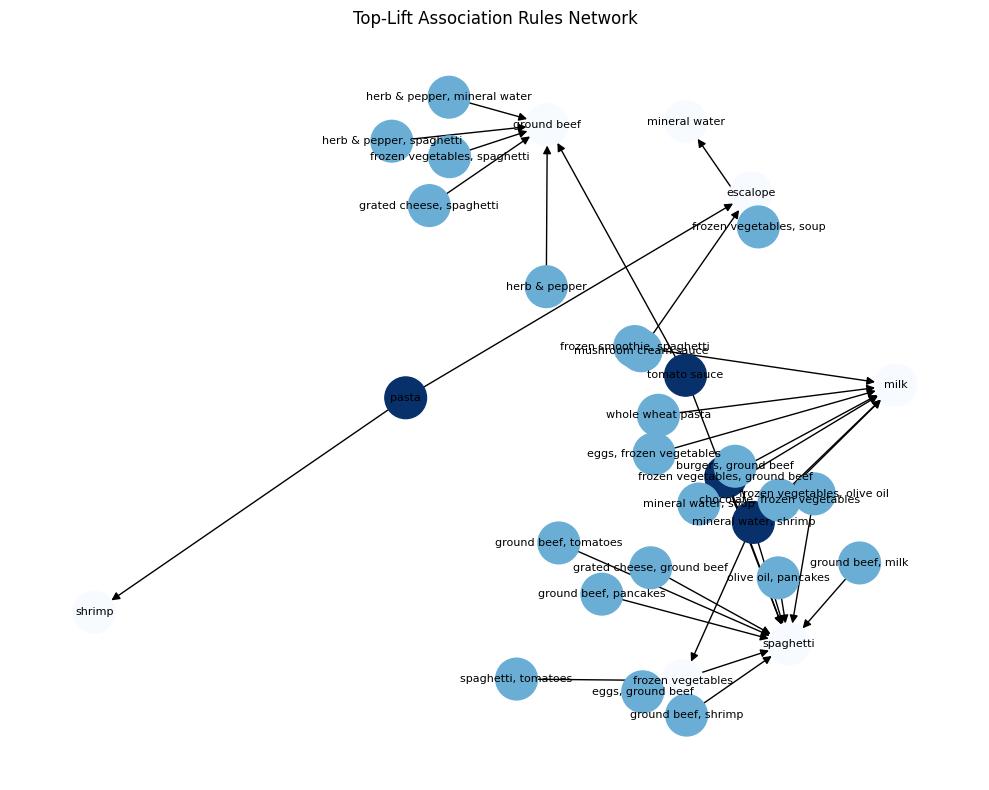

In [36]:
import networkx as nx
from matplotlib.colors import Normalize

TOP_K = 30
rules_sorted = rules.sort_values('lift', ascending=False).head(TOP_K)

G = nx.DiGraph([
    (', '.join(sorted(list(r['antecedents']))),
     ', '.join(sorted(list(r['consequents']))))
    for _, r in rules_sorted.iterrows()
])

pos = nx.spring_layout(G, seed=42, k=0.8, iterations=100)

outdeg = np.array([G.out_degree(n) for n in G.nodes()])
norm = Normalize(vmin=outdeg.min(), vmax=max(outdeg.max(), 1))
colors = plt.cm.Blues(norm(outdeg))  

plt.figure(figsize=(10, 8))
nx.draw_networkx(
    G, pos,
    node_color=colors, node_size=900,
    arrows=True, arrowstyle='-|>', arrowsize=12,
    with_labels=True, font_size=8
)
plt.title('Top-Lift Association Rules Network')
plt.axis('off')

save_fig('rules_network')
plt.show()
